In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 3e-4
tottime = 10 
L = 1
N = 1000               
dx = L/N 
dt = 1e-3
nt = int(tottime/dt)
x = np.linspace(0,L,N+1)
v = 0.09*x

In [34]:
b = v * dt / dx
a = alpha * dt / dx**2
stab_par = (2 * a) + b
print(f"Stability parameter (min={stab_par.min()}, max={stab_par.max()})")
assert np.all(stab_par <= 0.91), "All stability parameter values must be ≤ 0.91"


Stability parameter (min=0.6, max=0.69)


In [35]:
sigma = 0.03
T_old = np.exp(-((x - 0.5)**2) / (2*sigma**2))
T_new = np.zeros_like(T_old)

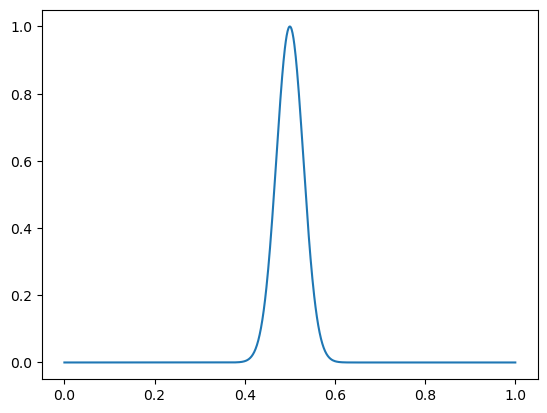

In [36]:
plt.plot(x, T_old, label='t=0')

In [37]:
all_values = np.zeros((nt+1,N+1))
all_values[0] = T_old

In [38]:
coeff1 = 1-(2*a)-b
coeff2 = a
coeff3 = a + b

In [39]:
coeff1

array([0.4    , 0.39991, 0.39982, ..., 0.31018, 0.31009, 0.31   ])

In [40]:
coeff2

0.3

In [41]:
coeff3

array([0.3    , 0.30009, 0.30018, ..., 0.38982, 0.38991, 0.39   ])

In [42]:
for n in range(1,nt+1):
    for i in range(1,N):
        T_new[i] = coeff1[i]*T_old[i] + coeff2*T_old[i+1] + coeff3[i]*T_old[i-1]
    T_old[:] = T_new[:]
    T_old[0] = T_old[1]
    T_old[-1] = T_old[-2] 
    all_values[n] = T_old

In [43]:
def function1(t):
    index = int(round(t/dt))
    assert 0<= index <= nt, "Index out of bounds"
    return all_values[index]

In [44]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, L)
ax.set_ylim(0, 1.1)
ax.set_xlabel("x")
ax.set_ylabel("T(x,t)")
ax.set_title("Heat Diffusion Over Time")
ax.grid()

time_text = ax.text(0.75, 1.02, '', transform=ax.transAxes)

times_to_show = np.arange(0, tottime+1) 
frames = [int(t / dt) for t in times_to_show]

frames = [f for f in frames if f <= nt]

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(frame):
    y = all_values[frame]
    line.set_data(x, y)
    t_sec = round(frame * dt, 2)
    time_text.set_text(f't = {t_sec} s')
    return line, time_text

ani = FuncAnimation(fig, update, frames=frames, init_func=init,
                    blit=False, repeat=True, interval=200)

plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())

